In [1]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
import librosa
import librosa.display

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam

D:\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [20]:
df=pd.read_csv("F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Metadata_Train.csv")
df2=pd.read_csv("F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Metadata_Test.csv")

In [ ]:
df

Sound_Guitar    700
Sound_Drum      700
Sound_Violin    700
Sound_Piano     529
Name: Class, dtype: int64


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


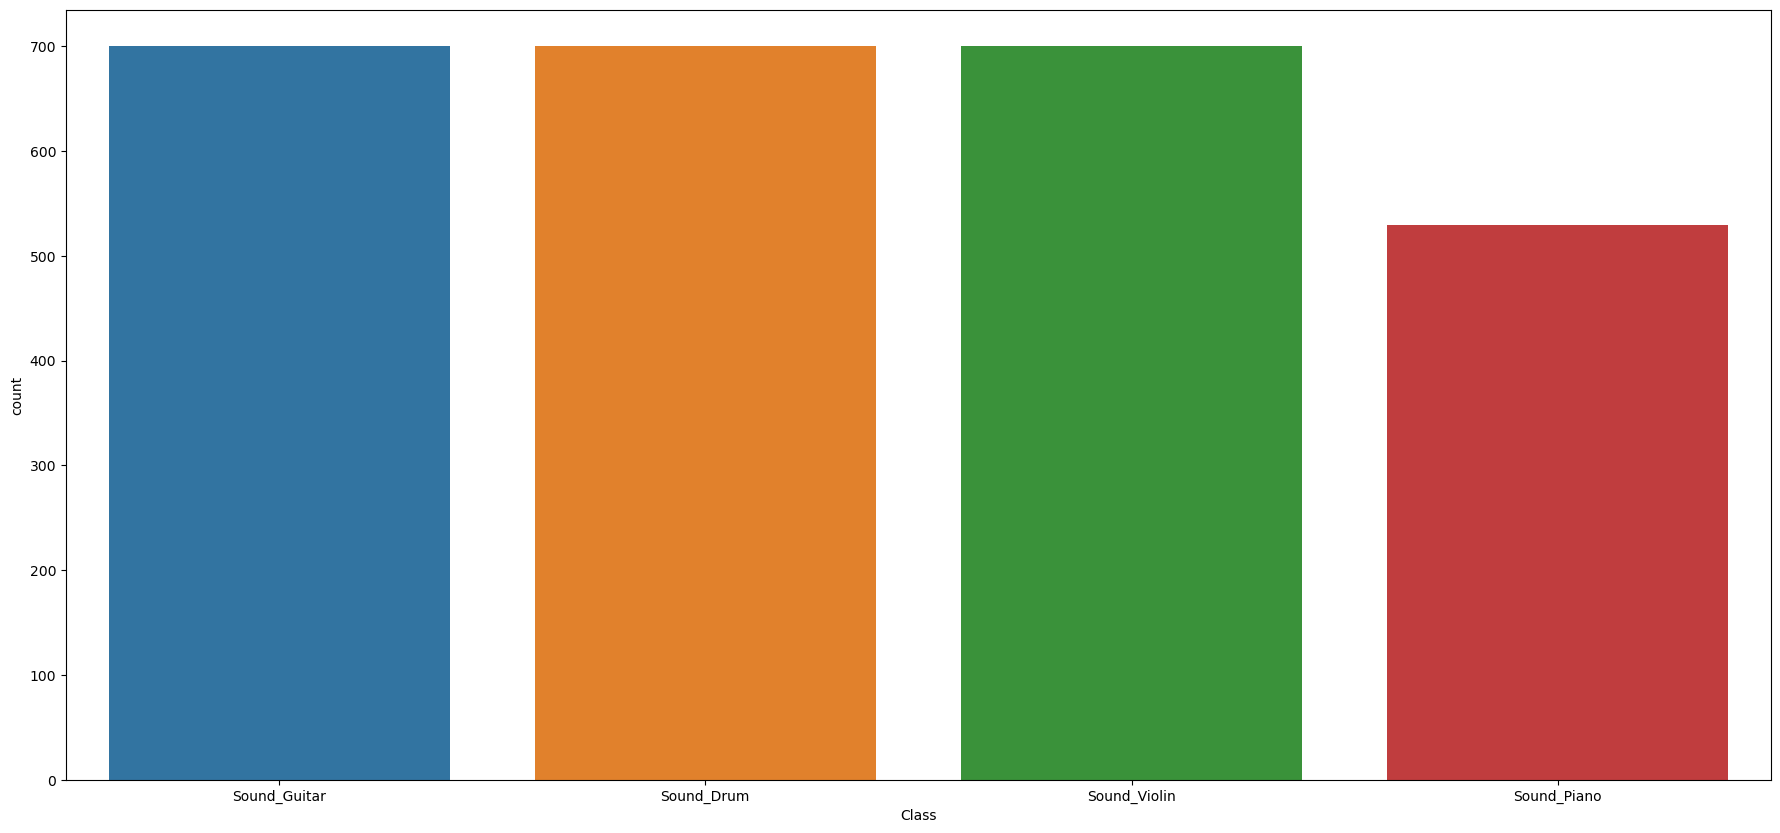

In [3]:
print(df['Class'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['Class'])
plt.xticks(rotation=0)

plt.show()


Sound_Guiatr    20
Sound_Drum      20
Sound_Violin    20
Sound_Piano     20
Name: Class, dtype: int64


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


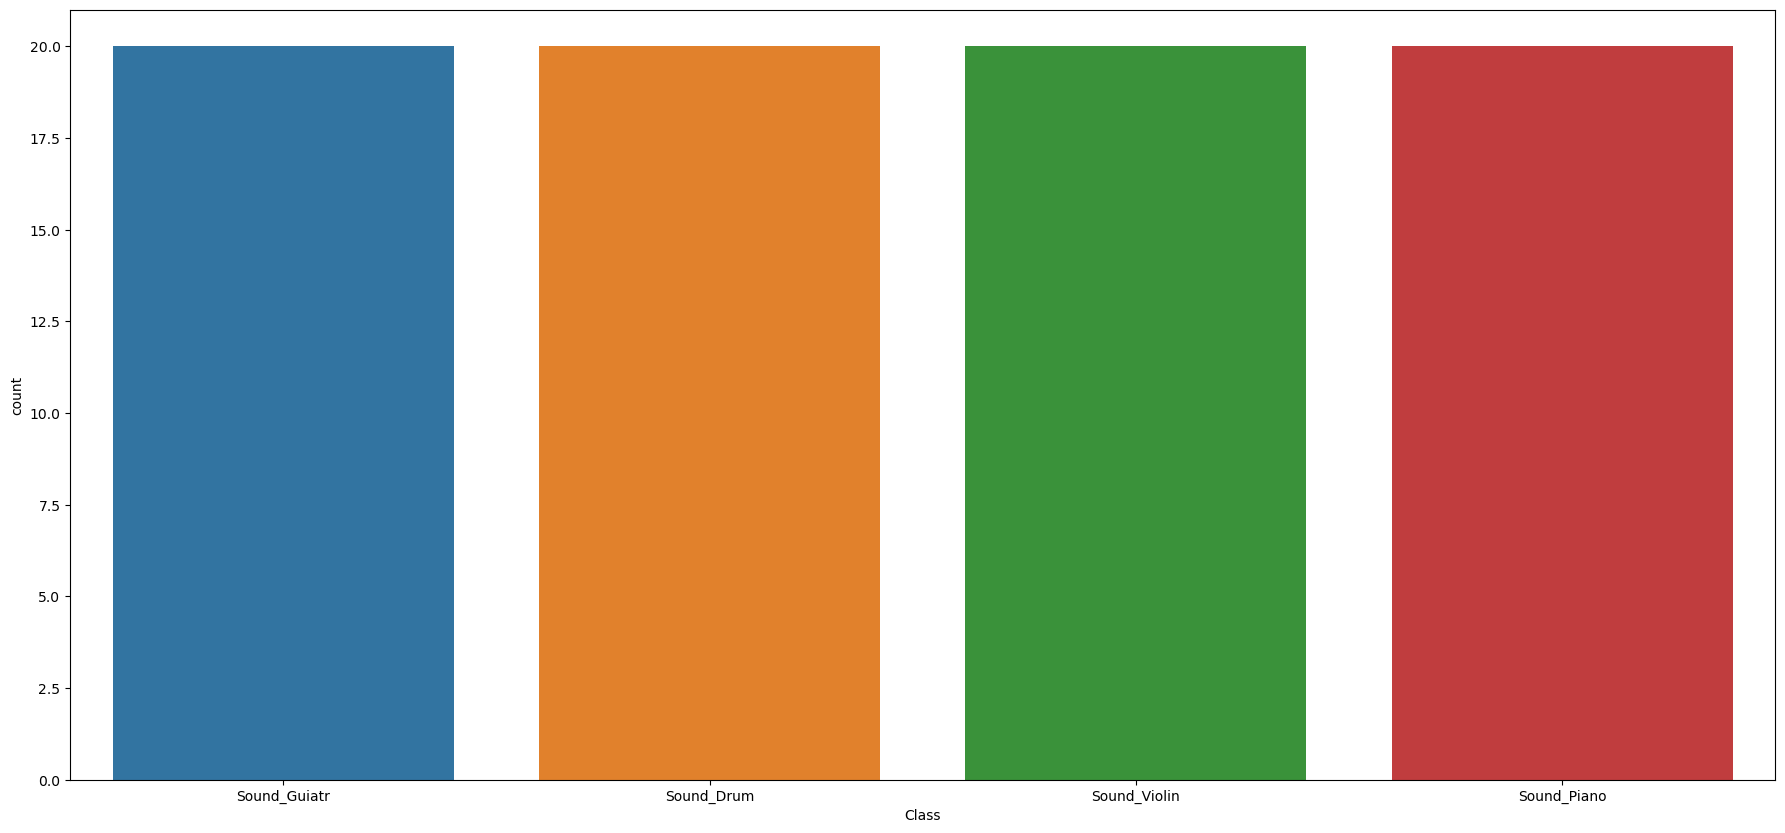

In [4]:
print(df2['Class'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df2['Class'])
plt.xticks(rotation=0)

plt.show()

In [16]:
df.set_index('FileName',inplace=True)

for f in df.index:
    rate, signal = wavfile.read('F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Train_submission/Train_submission/' + f)
    df.at[f, 'length'] = signal.shape[0]/rate

classes = list(np.unique(df.Class))
class_dist = df.groupby(['Class'])['length'].mean()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17136\940362774.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, signal = wavfile.read('F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Train_submission/Train_submission/' + f)


In [17]:
classes

['Sound_Drum', 'Sound_Guitar', 'Sound_Piano', 'Sound_Violin']

In [10]:
# Volume of each labels

# fig, ax = plt.subplots()
# ax.set_title('Class Distribution', y=1.08)
# ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
#        shadow=False, startangle=90)
# ax.axis('equal')
# plt.show()
# df.reset_index(inplace=True)

In [18]:
def calc_fft(y,sr):
    
    n=len(y)
    freq=np.fft.rfftfreq(n,d=1/sr)
    Y=abs(np.fft.rfft(y)/n)
    return (Y,freq)

In [19]:
# Valuable Info In Sample

def Envelope(y, rate, threshold):
    mask = []
    #we want a rolling window so we create series as it is easy with it
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/4), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
            
    return mask

In [21]:
signals = {}
fft = {}
fnames=[]
mfccs = {}

for c in classes:
    wav_file = df[df.Class == c].iloc[0,0]
    print(wav_file)
    fnames.append('F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Train_submission/Train_submission/'+ wav_file)
    signal, rate = librosa.load('F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Train_submission/Train_submission/'+wav_file,sr=44100)
    mask = Envelope(signal, rate, 0.0005) #0.0005 is experimental
    signal = signal[mask]
    signals[c] = signal
    fft[c] = calc_fft(signal, rate)

04-47367.wav
1-E1-Major 00.wav
029500_morning-rain-piano-65875.wav
04-47367.wav


In [ ]:
df

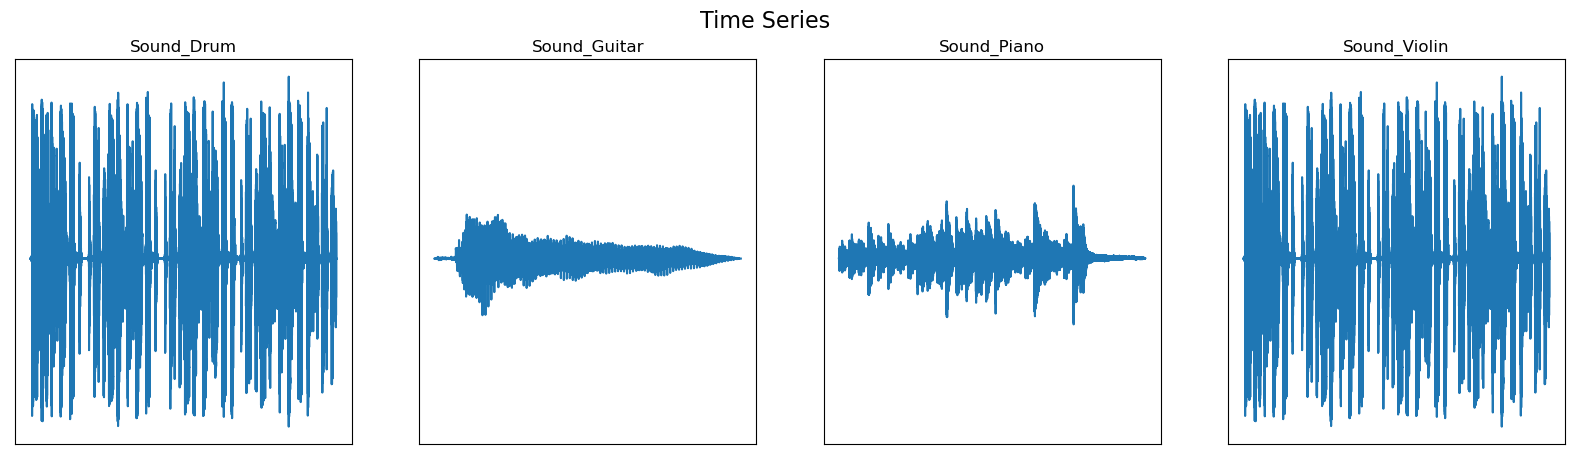

In [22]:

def plot_signals(signals):
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(4):
            axes[x].set_title(list(signals.keys())[i])
            axes[x].plot(list(signals.values())[i])
            axes[x].get_xaxis().set_visible(False)
            axes[x].get_yaxis().set_visible(False)
            i += 1
plot_signals(signals)
plt.show()

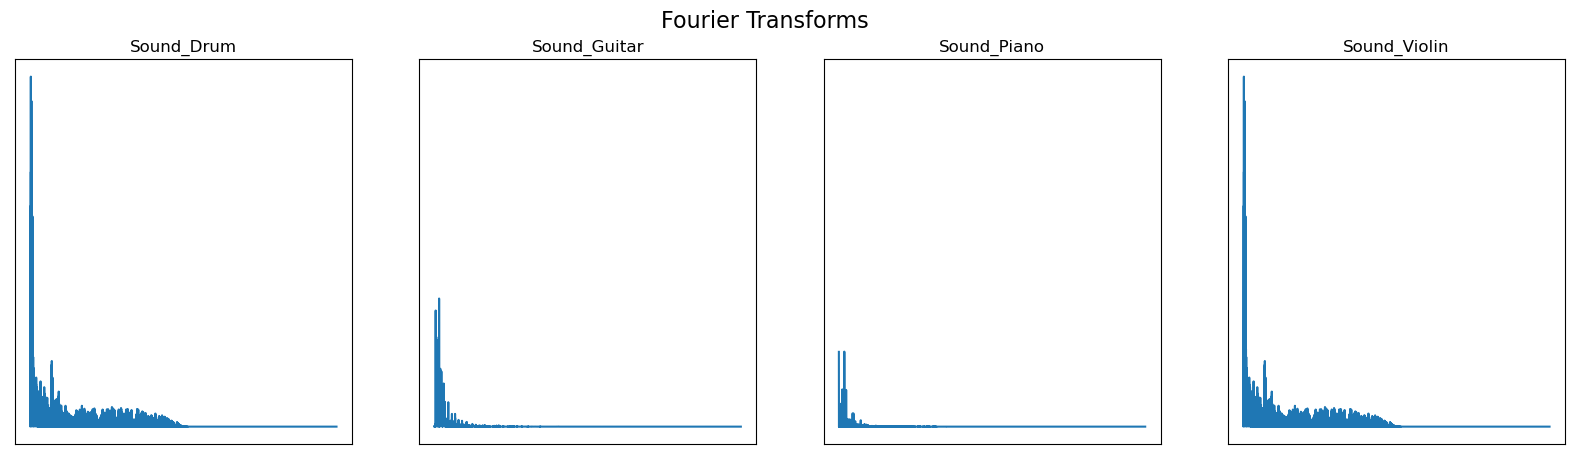

In [23]:
def plot_fft(fft):
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(4):
        
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x].set_title(list(fft.keys())[i])
            axes[x].plot(freq, Y)
            axes[x].get_xaxis().set_visible(False)
            axes[x].get_yaxis().set_visible(False)
            i += 1
plot_fft(fft)
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17136\2729495489.py:11: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00017683 -0.00011937
 -0.00011121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  c1 = librosa.feature.melspectrogram(data[0], sr=25000)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17136\2729495489.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00017683 -0.00011937
 -0.00011121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  c2 = librosa.feature.melspectrogram(data[1], sr=25000)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17136\2729495489.py:17: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00017683 -0.00011937
 -0.00011121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  c3 = librosa.feature.melspectrogram(da

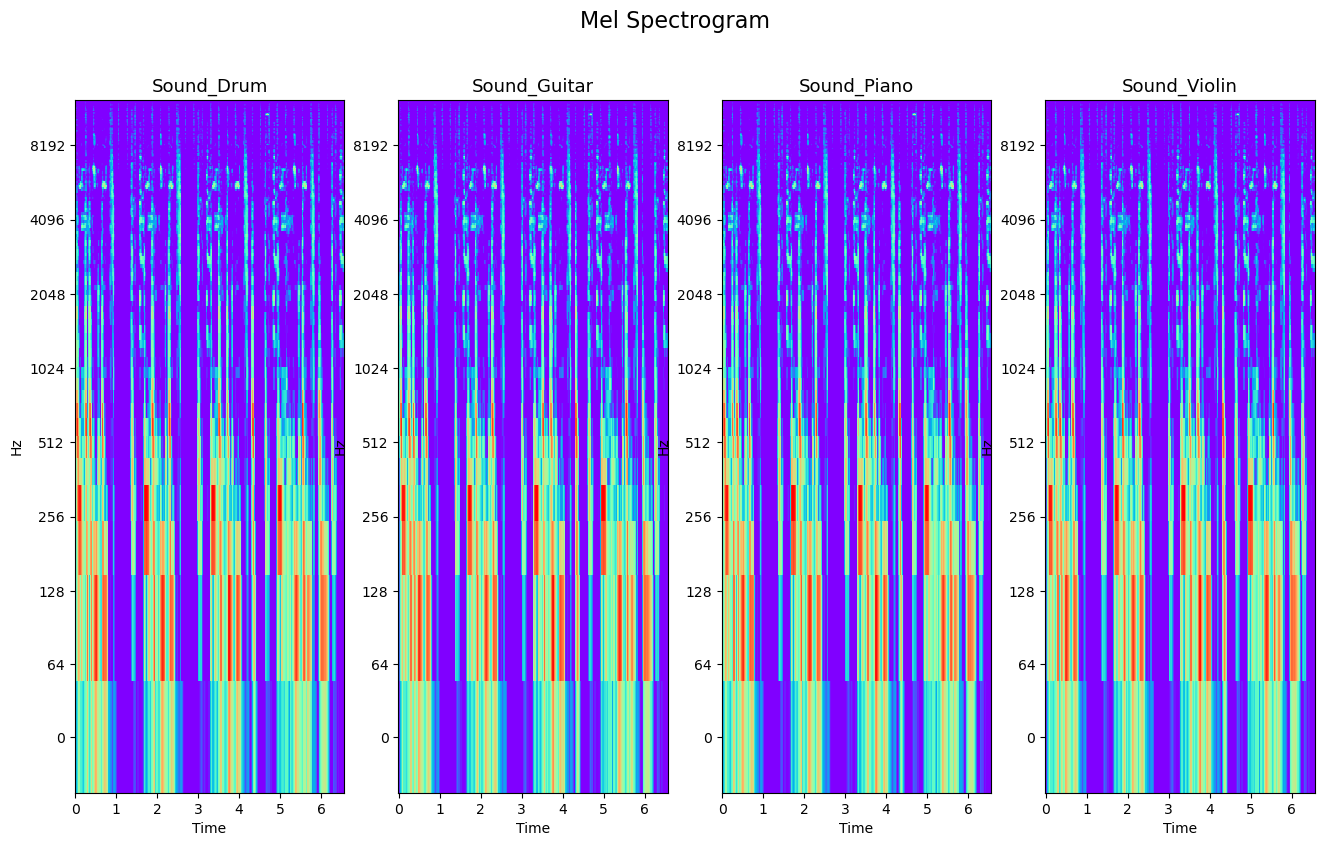

In [24]:
# Mel Spectograms

data=[]
hop_length = 512 
ename=list(signals.keys())
for i in fnames:
    y_data,sr_data=librosa.load(fnames[0])
    data.append(y_data)

        
c1 = librosa.feature.melspectrogram(data[0], sr=25000)
S_c1 = librosa.amplitude_to_db(c1, ref=np.max)

c2 = librosa.feature.melspectrogram(data[1], sr=25000)
S_c2 = librosa.amplitude_to_db(c2, ref=np.max)

c3 = librosa.feature.melspectrogram(data[2], sr=25000)
S_c3 = librosa.amplitude_to_db(c3, ref=np.max)

c4 = librosa.feature.melspectrogram(data[3], sr=25000)
S_c4 = librosa.amplitude_to_db(c4, ref=np.max)



# === PLOT ====
fig, ax = plt.subplots(1, 4, figsize=(16, 9))
fig.suptitle('Mel Spectrogram', fontsize=16)


librosa.display.specshow(S_c1, sr =25000, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[0])
librosa.display.specshow(S_c2, sr=25000, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[1])
librosa.display.specshow(S_c3, sr=25000, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[2])
librosa.display.specshow(S_c4, sr=25000, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[3])


for i, name in zip(range(0, 1*4), ename):
    x = i % 4
    ax[x].set_title(name, fontsize=13)

# Approach 2

In [25]:
# mfcc Extractor

def Feature_extractor(file):
    
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features =np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [26]:
extracted_features=[]

for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath('F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Train_submission/Train_submission/'),str(row["FileName"]))
    final_class_label=row["Class"]
    data=Feature_extractor(file_name)
    extracted_features.append([data,final_class_label])

2629it [08:17,  5.29it/s]


In [27]:
extracted_features

[[array([-3.88428894e+02,  2.05197342e+02,  7.86361122e+00,  3.92866669e+01,
          1.38562984e+01, -2.54768044e-01, -1.04785395e+01, -3.95477867e+00,
         -4.72812700e+00, -9.22212887e+00, -3.27247000e+00,  4.76163578e+00,
         -1.36694205e+00, -9.52626991e+00, -1.25170765e+01, -6.77821541e+00,
         -7.09602880e+00, -8.44930172e+00, -4.89150333e+00,  6.57909918e+00,
         -1.37392914e+00,  3.42159295e+00, -4.94433928e+00, -2.66052074e+01,
         -1.34544935e+01, -1.48785295e+01, -1.10950632e+01,  1.32931442e+01,
         -6.58823252e-01, -8.56064606e+00, -8.43388844e+00, -1.61755238e+01,
          1.59957147e+00,  1.19361248e+01,  4.35158157e+00, -7.55195713e+00,
         -2.22148647e+01, -2.27566261e+01, -3.64499974e+00,  8.37249374e+00],
        dtype=float32),
  'Sound_Guitar'],
 [array([-3.5954538e+02,  1.7162688e+02,  1.0192535e+01,  3.7611431e+01,
          1.8924229e+01,  7.3422351e+00, -3.7729269e-01,  4.0575967e+00,
          3.6290017e-01, -7.4757800e+00,

In [28]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head(20)

,features,class
0,"[-388.4289, 205.19734, 7.863611, 39.286667, 13...",Sound_Guitar
1,"[-359.54538, 171.62688, 10.192535, 37.61143, 1...",Sound_Guitar
2,"[-347.31915, 178.11375, 2.1611729, 38.960228, ...",Sound_Guitar
3,"[-389.92075, 177.8204, 10.302906, 42.16702, 14...",Sound_Guitar
4,"[-372.23615, 161.71027, 10.579021, 45.089127, ...",Sound_Guitar
5,"[-391.01813, 173.12811, 18.012999, 37.28042, 1...",Sound_Guitar
6,"[-386.7482, 162.40793, 15.373853, 42.025448, 2...",Sound_Guitar
7,"[-408.49643, 160.14922, 20.34738, 41.80766, 18...",Sound_Guitar
8,"[-398.09885, 147.52005, 24.257866, 43.7894, 3....",Sound_Guitar
9,"[-411.7316, 151.5299, 22.383932, 37.782017, 2....",Sound_Guitar


In [29]:
test_df = extracted_features_df
# remove a category value from a category type column in Pandas
test_df.drop(test_df[test_df['class'] == 'Sound_Violin'].index, inplace = True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 2628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   features  1929 non-null   object
 1   class     1929 non-null   object
dtypes: object(2)
memory usage: 45.2+ KB


In [30]:
extracted_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 2628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   features  1929 non-null   object
 1   class     1929 non-null   object
dtypes: object(2)
memory usage: 45.2+ KB


In [31]:
X=np.array(extracted_features_df['features'].tolist())
Y=np.array(extracted_features_df["class"].tolist())

In [32]:
X.shape

(1929, 40)

In [ ]:
classes

In [33]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y=to_categorical(LE.fit_transform(Y))

In [ ]:
df_test = pd.DataFrame()
df_test['Labels'] = Y
df_test['Enconded_label'] = [i for i in y]
df_test[df_test['Labels'] == 'Sound_Violin']

In [ ]:
classes

In [ ]:
y

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(1543, 40)

In [35]:
from sklearn.model_selection import train_test_split
X_actual_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

In [36]:
print("Shape Of X_train:",X_actual_train.shape)
print("Shape Of X_test:",X_test.shape)
print("Shape Of y_train:",y_train.shape)
print("Shape Of y_test:",y_test.shape)
print("Shape Of y_validation:",y_validation.shape)

Shape Of X_train: (1234, 40)
Shape Of X_test: (386, 40)
Shape Of y_train: (1234, 3)
Shape Of y_test: (386, 3)
Shape Of y_validation: (309, 3)


In [37]:
# Setting labels
num_labels=y.shape[1]

In [38]:
# model=Sequential()
# model.add(Dense(100,input_shape=(40,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.3))

# model.add(Dense(200))
# model.add(Activation('relu'))
# model.add(Dropout(0.3))

# model.add(Dense(200))
# model.add(Activation('relu'))
# model.add(Dropout(0.3))

# model.add(Dense(100))
# model.add(Activation('relu'))
# model.add(Dropout(0.3))

# model.add(Dense(num_labels))
# model.add(Activation('softmax'))
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_actual_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation="softmax"),
    
])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               20992     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint
# tf.keras.callbacks.ModelCheckpoint
from datetime import datetime

num_epochs=300
num_batch_size=128


start=datetime.now()
history = model.fit(X_actual_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_validation,y_validation))

duration=datetime.now()-start
print("Training Completed in time: ",duration)

Epoch 1/300
10/10 [==============================] - 2s 27ms/step - loss: 7.2384 - accuracy: 0.4546 - val_loss: 0.7444 - val_accuracy: 0.7346
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 2.5959 - accuracy: 0.5559 - val_loss: 0.5913 - val_accuracy: 0.7217
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 1.9292 - accuracy: 0.5640 - val_loss: 0.5431 - val_accuracy: 0.6926
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 1.2608 - accuracy: 0.6467 - val_loss: 0.3768 - val_accuracy: 0.8317
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: 1.0495 - accuracy: 0.6596 - val_loss: 0.4286 - val_accuracy: 0.8447
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: 0.8576 - accuracy: 0.7091 - val_loss: 0.3775 - val_accuracy: 0.8414
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: 0.7423 - accuracy: 0.7253 - val_loss: 0.3552 - val_accuracy: 0.8641
Epoch 8/300


Epoch 59/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1988 - accuracy: 0.9400 - val_loss: 0.1721 - val_accuracy: 0.9482
Epoch 60/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1554 - accuracy: 0.9514 - val_loss: 0.1786 - val_accuracy: 0.9547
Epoch 61/300
10/10 [==============================] - 0s 6ms/step - loss: 0.1743 - accuracy: 0.9530 - val_loss: 0.1768 - val_accuracy: 0.9515
Epoch 62/300
10/10 [==============================] - 0s 6ms/step - loss: 0.1533 - accuracy: 0.9498 - val_loss: 0.1794 - val_accuracy: 0.9482
Epoch 63/300
10/10 [==============================] - 0s 6ms/step - loss: 0.1655 - accuracy: 0.9498 - val_loss: 0.1899 - val_accuracy: 0.9417
Epoch 64/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1817 - accuracy: 0.9489 - val_loss: 0.1753 - val_accuracy: 0.9482
Epoch 65/300
10/10 [==============================] - 0s 7ms/step - loss: 0.1480 - accuracy: 0.9481 - val_loss: 0.1786 - val_accuracy: 0.9482
Epoch 

10/10 [==============================] - 0s 7ms/step - loss: 0.0677 - accuracy: 0.9781 - val_loss: 0.1971 - val_accuracy: 0.9547
Epoch 117/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0713 - accuracy: 0.9741 - val_loss: 0.2010 - val_accuracy: 0.9579
Epoch 118/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0612 - accuracy: 0.9773 - val_loss: 0.2232 - val_accuracy: 0.9547
Epoch 119/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0654 - accuracy: 0.9741 - val_loss: 0.2445 - val_accuracy: 0.9482
Epoch 120/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0690 - accuracy: 0.9797 - val_loss: 0.2123 - val_accuracy: 0.9579
Epoch 121/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0730 - accuracy: 0.9765 - val_loss: 0.2093 - val_accuracy: 0.9515
Epoch 122/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0753 - accuracy: 0.9765 - val_loss: 0.2046 - val_accuracy: 0.9515
Epoch 123/300

10/10 [==============================] - 0s 7ms/step - loss: 0.0296 - accuracy: 0.9887 - val_loss: 0.3191 - val_accuracy: 0.9547
Epoch 174/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.3131 - val_accuracy: 0.9579
Epoch 175/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0330 - accuracy: 0.9927 - val_loss: 0.3105 - val_accuracy: 0.9547
Epoch 176/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0336 - accuracy: 0.9887 - val_loss: 0.3033 - val_accuracy: 0.9547
Epoch 177/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0250 - accuracy: 0.9878 - val_loss: 0.3322 - val_accuracy: 0.9547
Epoch 178/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.3225 - val_accuracy: 0.9515
Epoch 179/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0372 - accuracy: 0.9895 - val_loss: 0.3446 - val_accuracy: 0.9547
Epoch 180/300

10/10 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.9951 - val_loss: 0.3921 - val_accuracy: 0.9612
Epoch 231/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.4444 - val_accuracy: 0.9547
Epoch 232/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 0.9895 - val_loss: 0.4574 - val_accuracy: 0.9482
Epoch 233/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.9903 - val_loss: 0.5042 - val_accuracy: 0.9482
Epoch 234/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.4097 - val_accuracy: 0.9482
Epoch 235/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0427 - accuracy: 0.9862 - val_loss: 0.4604 - val_accuracy: 0.9482
Epoch 236/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0313 - accuracy: 0.9919 - val_loss: 0.4092 - val_accuracy: 0.9417
Epoch 237/300

10/10 [==============================] - 0s 7ms/step - loss: 0.0199 - accuracy: 0.9959 - val_loss: 0.5308 - val_accuracy: 0.9450
Epoch 288/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0256 - accuracy: 0.9927 - val_loss: 0.6574 - val_accuracy: 0.9450
Epoch 289/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0502 - accuracy: 0.9862 - val_loss: 0.5002 - val_accuracy: 0.9450
Epoch 290/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0303 - accuracy: 0.9919 - val_loss: 0.5343 - val_accuracy: 0.9450
Epoch 291/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9911 - val_loss: 0.5102 - val_accuracy: 0.9579
Epoch 292/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9935 - val_loss: 0.5002 - val_accuracy: 0.9547
Epoch 293/300
10/10 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.4664 - val_accuracy: 0.9515
Epoch 294/300

In [42]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

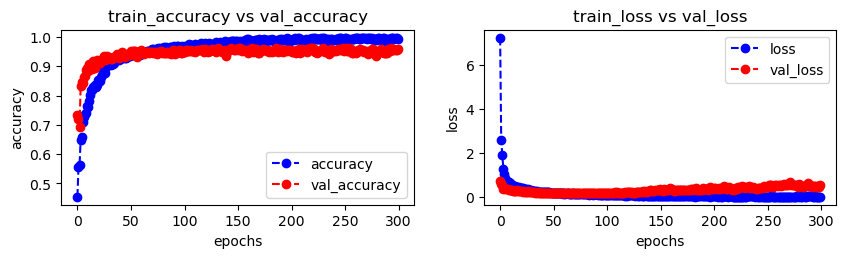

In [43]:
plot_accuracy_loss(history)

In [45]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
#print(test_accuracy[1])

In [ ]:
y_pred = [np.argmax(i) for i in model.predict(X_test)]

In [ ]:
classes

In [ ]:
y_true = [np.argmax(i) for i in y_test]
y_true

In [ ]:


import sklearn
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score Macro',accuracy_score(y_true,y_pred)*100,'%')
print('Precision Score Macro',precision_score(y_true,y_pred,average = 'macro')*100,'%')
print('Recall_Score Macro',recall_score(y_true,y_pred, average = 'macro')*100,'%')
print('F1_Score Macro',f1_score(y_true,y_pred, average = 'macro')*100,'%')


print(sklearn.metrics.classification_report(y_true,y_pred))

In [ ]:
classes

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_true,y_pred ), annot=True, fmt=".0f")
plt.title(" Confusion Matrix",fontsize=18, color="red")

In [ ]:
filename="F:/Simbolo/DataScience Project Bootcamp/Project/instrumentdatazip/Test_submission/Test_submission/guitar-soundtrack-55233.wav"
audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features =np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)

predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)

prediction_class=LE.inverse_transform(predicted_label)
prediction_class

In [ ]:
import IPython.display as ipd 
ipd.Audio(filename)

In [ ]:
import pickle
filename = 'deeplearning_classifier_dropping.sav'
pickle.dump(model, open(filename,'wb'))

In [ ]:
import pickle
classifier = pickle.load(
        open('C:/Users/Aung Sann Thit/Simbolo/DataScience BootCamp/instrument_classifier.sav', 'rb'))

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
#load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])